In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
raw = pd.read_csv('playoff_shots.csv')

In [4]:
raw.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,41700131,149,2544,LeBron James,1610612739,Cleveland Cavaliers,1,1,24,...,Left Side Center(LC),24+ ft.,26,-168,206,1,0,20180415,CLE,IND
1,Shot Chart Detail,41700131,153,2544,LeBron James,1610612739,Cleveland Cavaliers,1,1,5,...,Center(C),Less Than 8 ft.,0,3,1,1,0,20180415,CLE,IND
2,Shot Chart Detail,41700131,155,2544,LeBron James,1610612739,Cleveland Cavaliers,1,0,58,...,Center(C),Less Than 8 ft.,0,0,-6,1,0,20180415,CLE,IND
3,Shot Chart Detail,41700131,187,2544,LeBron James,1610612739,Cleveland Cavaliers,2,11,8,...,Center(C),Less Than 8 ft.,1,-8,13,1,1,20180415,CLE,IND
4,Shot Chart Detail,41700131,195,2544,LeBron James,1610612739,Cleveland Cavaliers,2,10,22,...,Center(C),Less Than 8 ft.,1,2,10,1,1,20180415,CLE,IND


In [5]:
shot_made_flag = raw[pd.notnull(raw['SHOT_MADE_FLAG'])]

Text(0.5, 1.0, 'loc_x and loc_y')

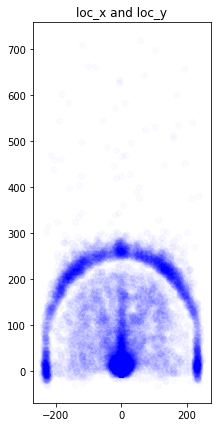

In [6]:
alpha = 0.02
plt.figure(figsize=(7,7))

# loc_x and loc_y
plt.subplot(121)
plt.scatter(shot_made_flag.LOC_X, shot_made_flag.LOC_Y, color='blue', alpha=alpha)
plt.title('loc_x and loc_y')

In [7]:
import matplotlib.cm as cm

In [8]:
plt.figure(figsize=(20,10))

def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = shot_made_flag.groupby(feat)
    cs = cm.rainbow(np.linspace(0, 3, len(gs)))
    for g, c in zip(gs, cs):
        plt.scatter(g[1].LOC_X, g[1].LOC_Y, color=c, alpha=alpha)

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'shot_zone_area')

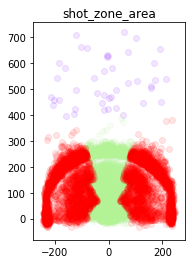

In [9]:
# shot_zone_area
plt.subplot(121)
scatter_plot_by_category('SHOT_ZONE_AREA')
plt.title('shot_zone_area')

Text(0.5, 1.0, 'shot_zone_basic')

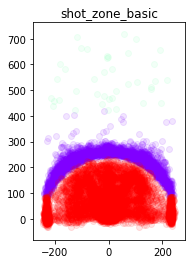

In [10]:
# shot_zone_basic
plt.subplot(121)
scatter_plot_by_category('SHOT_ZONE_BASIC')
plt.title('shot_zone_basic')

Text(0.5, 1.0, 'shot_zone_range')

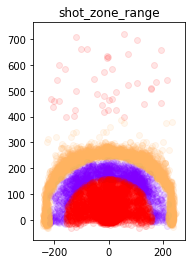

In [11]:
# shot_zone_range
plt.subplot(121)
scatter_plot_by_category('SHOT_ZONE_RANGE')
plt.title('shot_zone_range')

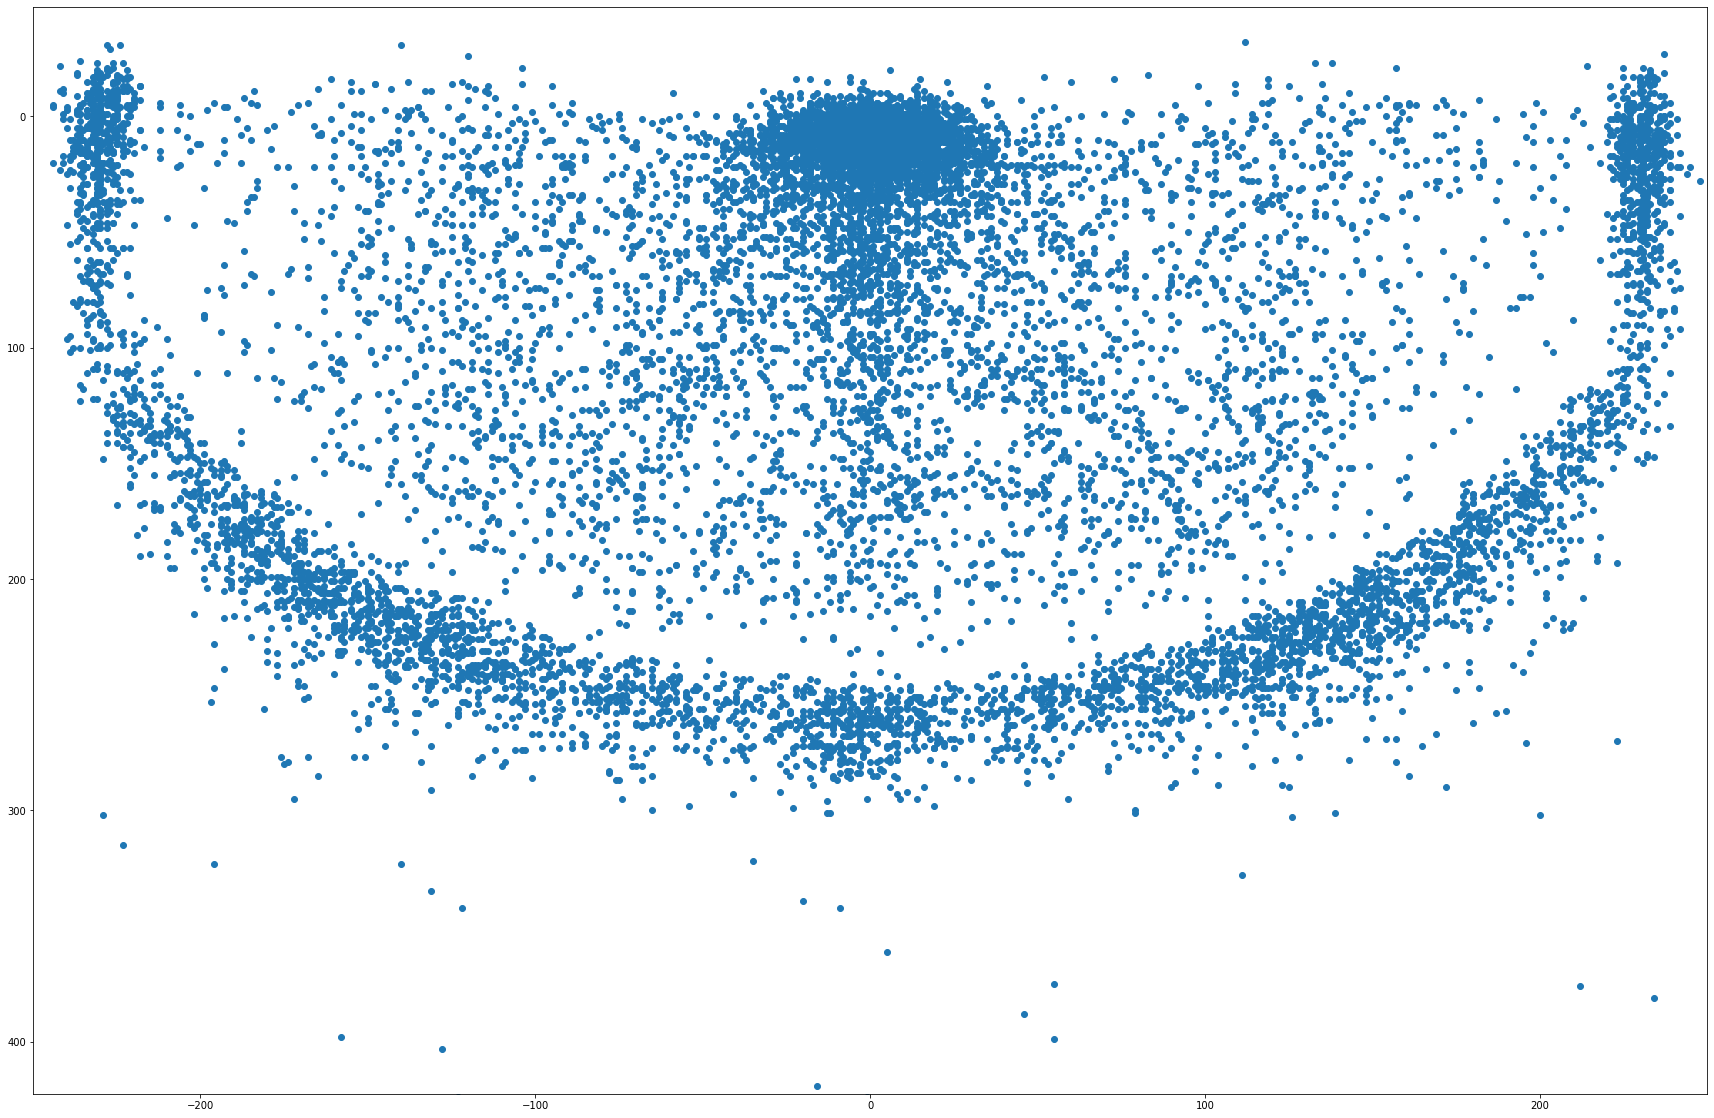

In [12]:
plt.figure(figsize=(30,20))
plt.scatter(raw.LOC_X, raw.LOC_Y)
# plt.xlim(300,-300)
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
plt.show()